In [85]:
import h5py
import numpy as np
import pygmt
import xarray as xr

In [ ]:
# with h5py.File('./optimize/model_M15.h5', 'r') as f:
with h5py.File('./optimize/model_M15.h5', 'r') as f:
    x = f['x'][:]
    y = f['y'][:]
    z = f['z'][:]
    vsf = f['vs'][:]
    vpf = f['vp'][:]
    rhof = f['rho'][:]
with h5py.File('./optimize/model_M00.h5', 'r') as f:
    x = f['x'][:]
    y = f['y'][:]
    z = f['z'][:]
    vsi = f['vs'][:]
    vpi = f['vp'][:]
    rhoi = f['rho'][:]

dvs = 100 *(vsf - vsi) / vsf
dvp = 100 *(vpf - vpi) / vpf
drho = 100 *(rhof - rhoi) / rhof

basemap [WARNING]: 2.5091i not a valid number and may not be decoded properly.
grdimage [WARNING]: 2.5091i not a valid number and may not be decoded properly.
text [WARNING]: 2.5091i not a valid number and may not be decoded properly.
basemap [WARNING]: 2.5091i not a valid number and may not be decoded properly.
grdimage [WARNING]: 2.5091i not a valid number and may not be decoded properly.
text [WARNING]: 2.5091i not a valid number and may not be decoded properly.


50
18


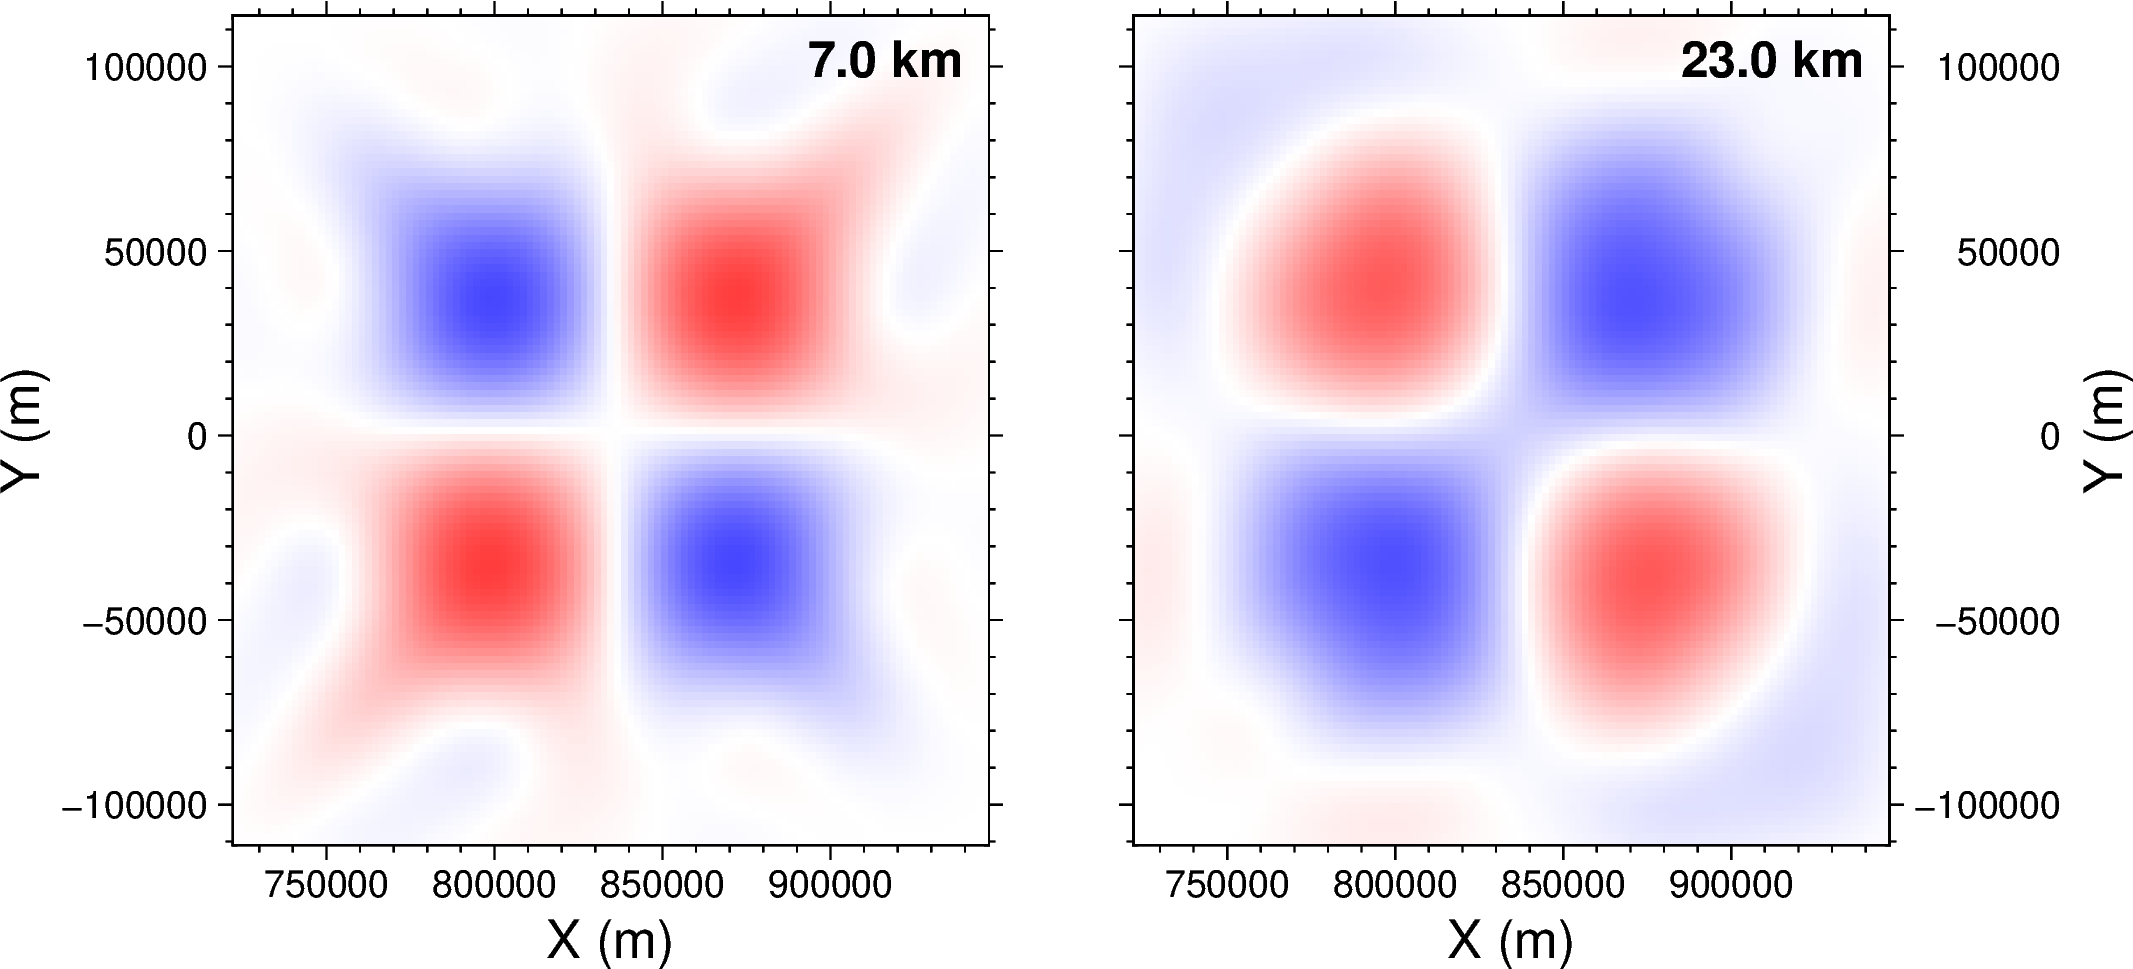

In [87]:
depth = [-7000, -23000]

fig = pygmt.Figure()
with fig.subplot(nrows=1, ncols=2, figsize=("14c", "7c"),
                 margins=["0.5c", "0.5c"],
                 frame=['xaf+lX (m)', 'yaf+lY (m)', 'WSne'],
                 sharey=True,):
    for i, dep in enumerate(depth):
        iz = np.argmin(np.abs(z - dep))
        print(iz)
        fig.basemap(
            region=[x.min(), x.max(), y.min(), y.max()],
            projection="X?c", 
            panel=True
        )
        grid = xr.DataArray(
            dvs[:, :, iz].T,
            coords=[y, x],
            dims=["y", "x"],
        )
        pygmt.makecpt(
            cmap="polar",
            series=[-12, 12, 0.1],
            continuous=True,
            reverse=True,
        )
        fig.grdimage(
            grid=grid,
            cmap=True,
        )
        fig.text(
            text="%.1f km" % (dep / -1000),
            position="TR",
            font="12p,Helvetica-Bold",
            offset="-0.2c/-0.2c",
        )
fig.show()

80 (113, 113, 65)


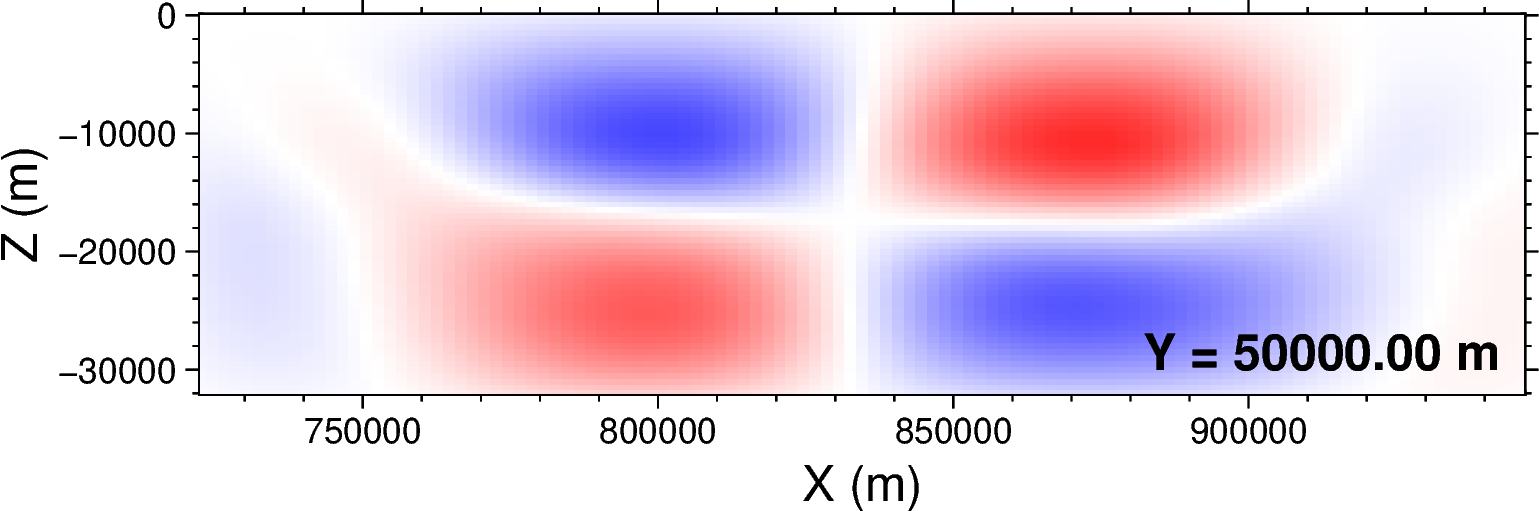

In [88]:
ysec = 50000
fig = pygmt.Figure()
fig.basemap(region=[x.min(), x.max(), z.min(), z.max()],
            projection="x0.00005c/0.0001c",
            frame=[f"WSne", "xaf+lX (m)", "yaf+lZ (m)"],)
iy = np.argmin(np.abs(y - ysec))
print(iy, dvs.shape)
grid = xr.DataArray(
        dvs[:, iy, :].T,
        coords=[z, x],
        dims=["y", "x"],
    )
pygmt.makecpt(
    cmap="polar",
    series=[-12, 12, 0.1],
    continuous=True,
    reverse=True,
)
fig.grdimage(
    grid=grid,
    cmap=True,
)
fig.text(
    text=f"Y = {ysec:.2f} m",
    position="BR",
    font="12p,Helvetica-Bold",
    offset="-0.2c/0.2c",
)
fig.show()